## First Look

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
train_path = "data/daisee_train_features.csv"
test_path = "data/daisee_test_features.csv"

df = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [6]:
df.describe()

,pitch_mean,pitch_std,pitch_min,pitch_max,pitch_p25,pitch_p50,pitch_p75,yaw_mean,yaw_std,yaw_min,...,ear_max,ear_p25,ear_p50,ear_p75,blink_count,blink_rate,face_ratio,pitch_stability,yaw_stability,label
count,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,...,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.0,2498.000000,2498.000000,2498.000000
mean,72.674041,13.296670,37.761032,103.662885,64.023895,73.029729,81.691996,-2.447897,4.676547,-13.755201,...,30.307734,25.742766,26.875375,27.848540,1.382706,0.138153,1.0,0.558195,0.844115,2.380304
std,33.950392,5.216267,35.810418,30.203332,35.203468,34.724880,33.992809,8.111552,1.701843,7.901734,...,3.108149,3.218063,3.131060,3.083173,3.024803,0.301962,0.0,0.168433,0.056728,0.640607
min,-13.436071,2.385074,-59.391045,10.361160,-27.832863,-16.986389,-9.906166,-29.647286,1.646328,-48.536591,...,18.246467,13.737581,14.895708,16.132814,0.000000,0.000000,1.0,0.000000,0.527660,0.000000
25%,46.864748,9.644889,10.725063,82.925201,36.224568,46.381460,56.643011,-8.034733,3.495782,-19.044216,...,28.210357,23.809944,24.943847,25.919310,0.000000,0.000000,1.0,0.467603,0.817414,2.000000
50%,71.242315,12.634390,32.220909,106.547272,61.342682,71.163383,80.651760,-3.068055,4.369747,-14.110130,...,30.497224,25.843823,27.078351,28.032580,0.000000,0.000000,1.0,0.578854,0.854342,2.000000
75%,100.248494,15.971916,62.728928,129.494270,91.948391,101.552162,109.525728,3.044926,5.477592,-8.876087,...,32.357279,27.958968,29.005386,29.886869,2.000000,0.200000,1.0,0.678504,0.883474,3.000000
max,146.307306,40.696138,137.551697,151.947784,145.240372,146.574402,148.684532,25.436267,14.170210,11.160492,...,42.978363,35.445668,36.252547,37.281792,41.000000,4.100000,1.0,0.920498,0.945122,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pitch_mean       2498 non-null   float64
 1   pitch_std        2498 non-null   float64
 2   pitch_min        2498 non-null   float64
 3   pitch_max        2498 non-null   float64
 4   pitch_p25        2498 non-null   float64
 5   pitch_p50        2498 non-null   float64
 6   pitch_p75        2498 non-null   float64
 7   yaw_mean         2498 non-null   float64
 8   yaw_std          2498 non-null   float64
 9   yaw_min          2498 non-null   float64
 10  yaw_max          2498 non-null   float64
 11  yaw_p25          2498 non-null   float64
 12  yaw_p50          2498 non-null   float64
 13  yaw_p75          2498 non-null   float64
 14  ear_mean         2498 non-null   float64
 15  ear_std          2498 non-null   float64
 16  ear_min          2498 non-null   float64
 17  ear_max       

In [8]:
df['video']

0       1100011002.avi
1       1100011003.avi
2       1100011004.avi
3       1100011005.avi
4       1100011006.avi
             ...      
2493    5221290259.avi
2494    5221290266.avi
2495     522129027.avi
2496    5221290270.avi
2497    5221290275.avi
Name: video, Length: 2498, dtype: object

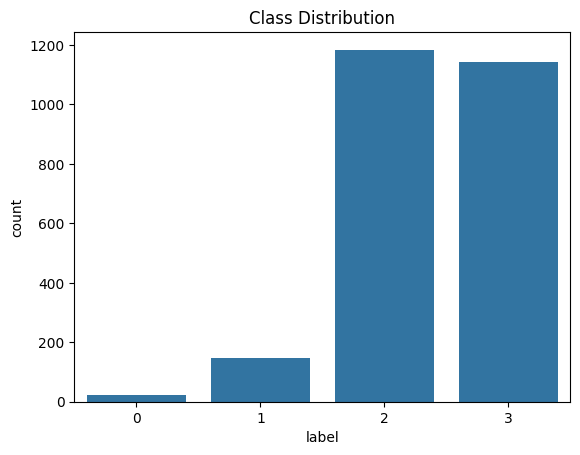

In [9]:
sns.countplot(data=df, x='label')
plt.title("Class Distribution")
plt.show()

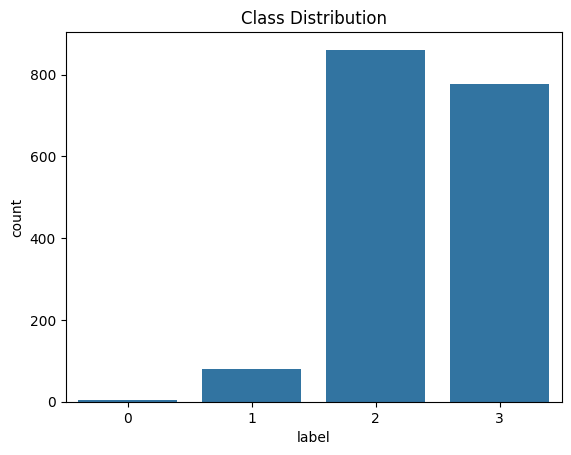

In [10]:
sns.countplot(data=test, x='label')
plt.title("Class Distribution")
plt.show()

In [11]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = num_cols.drop('label')

In [12]:
print("Numerical columns:", list(num_cols))
print("-----------------------------------"*5)
print("Categorical columns:", list(cat_cols))

Numerical columns: ['pitch_mean', 'pitch_std', 'pitch_min', 'pitch_max', 'pitch_p25', 'pitch_p50', 'pitch_p75', 'yaw_mean', 'yaw_std', 'yaw_min', 'yaw_max', 'yaw_p25', 'yaw_p50', 'yaw_p75', 'ear_mean', 'ear_std', 'ear_min', 'ear_max', 'ear_p25', 'ear_p50', 'ear_p75', 'blink_count', 'blink_rate', 'face_ratio', 'pitch_stability', 'yaw_stability']
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Categorical columns: ['video']


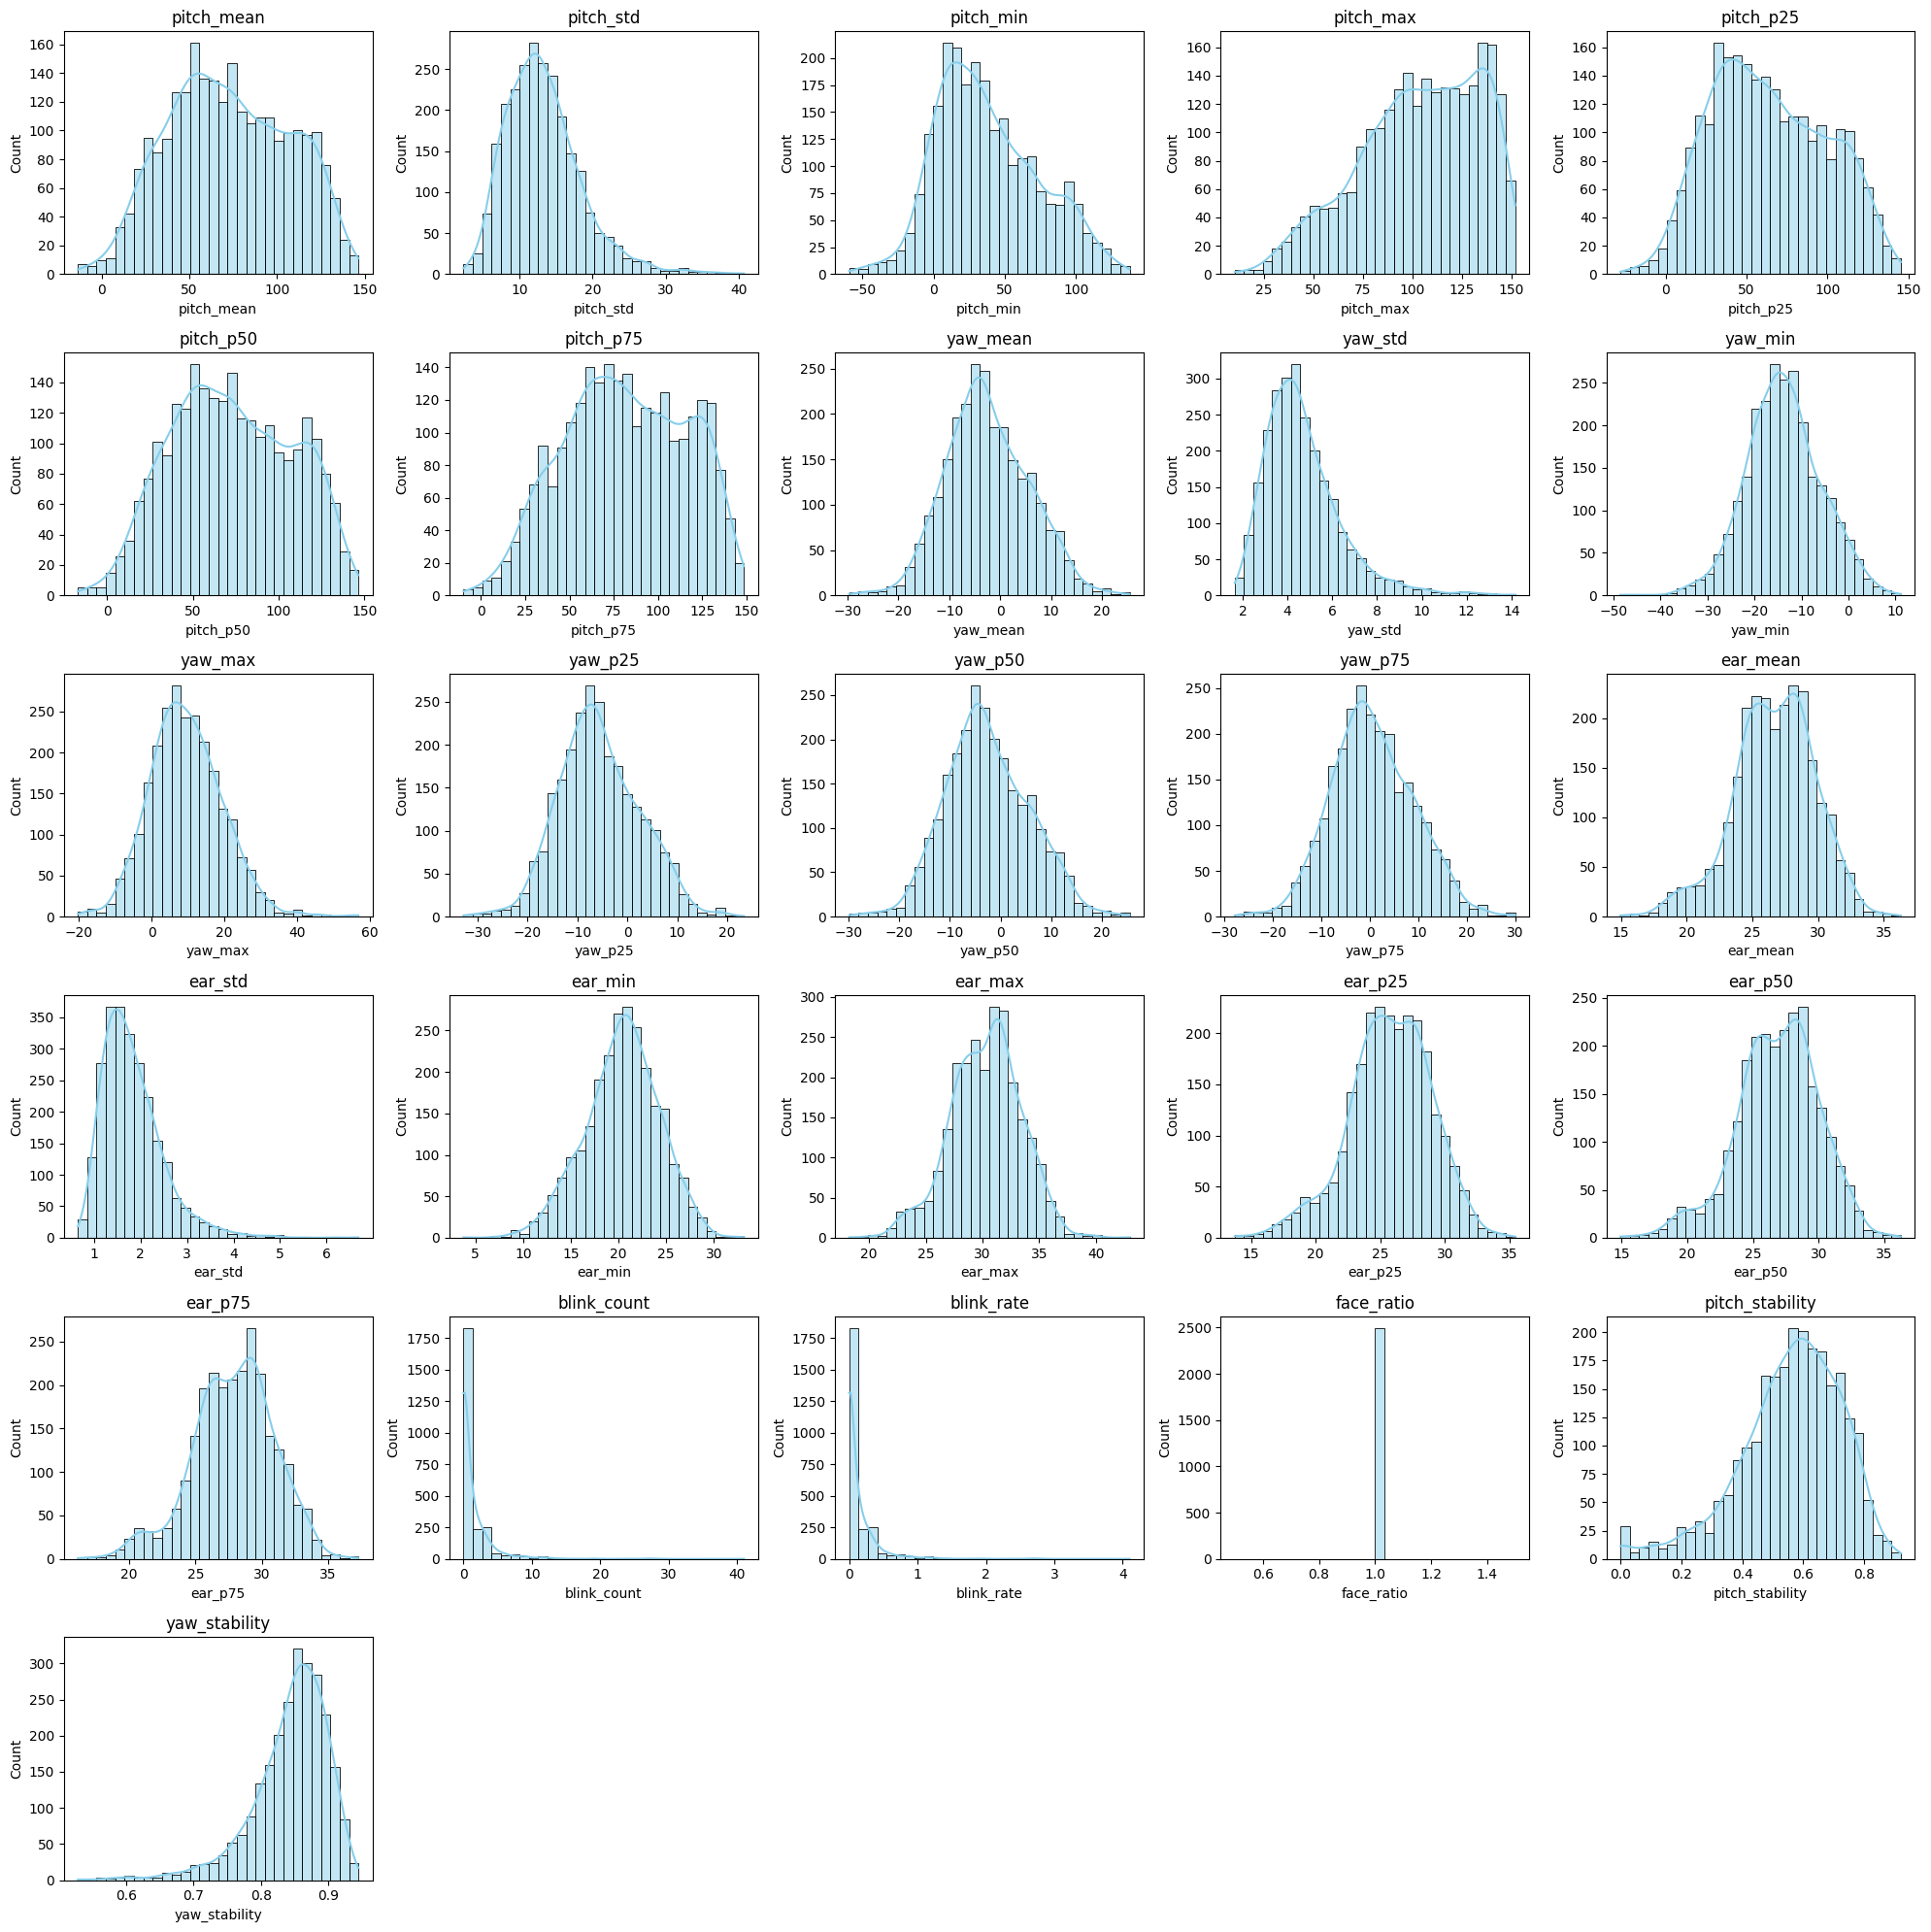

In [13]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(6, 5, i)  
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

Use numeric columns for scaling / PCA / SMOTE.

Encode the categorical column before combining.

In [14]:
X_train = df.drop(columns=['label'])
y_train = df['label']

In [15]:
X_test = test.drop(columns=['label'])
y_test = test['label']

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

In [17]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## Feature Selection

In [18]:
# pca_test = PCA(n_components=2)
# X_pca_test = pca.fit_transform(X_train_processed[num_cols])

# plt.figure(figsize=(8,6))
# plt.scatter(X_pca_test[:,0], X_pca_test[:,1], c=test['label'], cmap='viridis', s=20)
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')
# plt.title('PCA Visualization of Features')
# plt.show()

## Imblance in data

#### Geeks-For-Geeks : https://www.geeksforgeeks.org/machine-learning/handling-imbalanced-data-for-classification/

### Resampling (Undersampling and Oversampling)

In [19]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Oversampling using RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train_processed, y_train)
print("Oversampled class distribution:", Counter(y_over))


# Undersampling using RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_train_processed, y_train)
print("Undersampled class distribution:", Counter(y_under))

Oversampled class distribution: Counter({2: 1184, 0: 1184, 3: 1144, 1: 146})
Undersampled class distribution: Counter({3: 1144, 1: 146, 0: 24, 2: 24})


### SMOTE

In [20]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Display class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution after SMOTE: Counter({2: 1184, 3: 1184, 1: 1184, 0: 1184})


### Using Anomaly Detection Algorithms
- Anomaly or Outlier Detection algorithms are 'one class classification algorithms' that helps in identifying outliers ( rare data points) in the dataset.
- In an Imbalanced dataset, assume  'Majority class records as Normal data' and 'Minority Class records as Outlier data'.

In [23]:
import os
from scipy.sparse import issparse

# ============ 1. Define Helper Function ============

def ensure_dataframe(X, columns=None):
    """Convert sparse matrices or arrays to DataFrames safely, keeping column names."""
    if issparse(X):
        X = X.toarray()
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=columns)
    return X

# ============ 2. Prepare Data for Saving ============


# Use column names from the original processed train set
feature_names = (
    X_train_processed.columns
    if isinstance(X_train_processed, pd.DataFrame)
    else [f"feature_{i}" for i in range(X_train_processed.shape[1])]
)

# Ensure output folders exist
os.makedirs("data/balanced", exist_ok=True)

# Convert all X datasets safely
X_train = ensure_dataframe(X_train_processed, columns=feature_names)
X_test = ensure_dataframe(X_test, columns=feature_names)
X_over = ensure_dataframe(X_over, columns=feature_names)
X_under = ensure_dataframe(X_under, columns=feature_names)
X_train_resampled = ensure_dataframe(X_train_resampled, columns=feature_names)

# Ensure y are labeled Series
y_train = pd.Series(y_train, name="label")
y_test = pd.Series(y_test, name="label")
y_over = pd.Series(y_over, name="label")
y_under = pd.Series(y_under, name="label")
y_train_resampled = pd.Series(y_train_resampled, name="label")

# =========================
# 3. Combine and save
# =========================
datasets = {
    "train_processed": (X_train, y_train),
    "test_processed": (X_test, y_test),
    "balanced/train_oversampled": (X_over, y_over),
    "balanced/train_undersampled": (X_under, y_under),
    "balanced/train_smote": (X_train_resampled, y_train_resampled),
}

for name, (X, y) in datasets.items():
    df = pd.concat([X, y], axis=1)
    df.to_csv(f"data/{name}.csv", index=False)
